In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.set_option('mode.chained_assignment', None) #dealing with copy warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##### Data Loading

In [2]:
#Loading the dataset

original_dataset = pd.read_csv("C:/Users/fetih.kaya/Desktop/Forddata.csv")
dataset = original_dataset.copy()

dataset.head(10)

,Date bought,Customer,Bought,Amount
0,8/15/1990,113,other,27.29
1,8/16/1990,64,other,24.48
2,8/18/1990,49,ford,37.21
3,8/18/1990,54,ford,40.95
4,8/18/1990,83,other,9.02
5,8/20/1990,42,other,12.67
6,8/20/1990,79,other,29.61
7,8/21/1990,51,other,26.68
8,8/23/1990,4,ford,23.56
9,8/23/1990,116,other,19.18


***

# 1 - Calculation of Recency, Frequency and Monetary Values  

***

In [3]:
#General information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
Date bought    635 non-null object
Customer       635 non-null int64
Bought         635 non-null object
Amount         635 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.0+ KB


***
<font color='red'>
    
**The dataset has;**

-2 numerical and 2 categorical attributes, in total 4 columns

-635 rows

-no null values in entries

***

#### 1.1 - Removing "Bought" column which is not needed for RFM analysis

In [4]:
dataset = dataset.drop(["Bought"], axis=1)
dataset.shape

(635, 3)

<font color='red'> - There are now 635 rows and 3 columns which are "Date bought", "Customer" and "Amount"

#### 1.2 - Searching for how many unique customer are there

In [5]:
reduced_dataset = dataset.copy()

reduced_dataset = reduced_dataset.drop_duplicates(subset=['Customer'])
reduced_dataset.shape

(117, 3)

<font color='red'> - There are 117 unique customer in the dataset

#### 1.3 - Determination of start and end dates

<font color='red'> - It is preferred to search last 10 years data of the given dataset which is 2000-2010 (2011 and 2012 not included because of there are very few entries)

In [6]:
startDate = datetime.datetime(2000, 1, 1)
endDate = datetime.datetime(2010, 12, 31)

#### 1.4 - Ranking the rows in accordance with customer ids 

In [7]:
dataset['Date bought'] = pd.to_datetime(dataset['Date bought']) 
ranked_dataset = dataset.sort_values(['Date bought'], ascending=False)

#### 1.5 - Remove the records before startDate and after endDate

In [8]:
ranked_dataset = ranked_dataset[(ranked_dataset['Date bought'] >= startDate) & (ranked_dataset['Date bought'] <= endDate)]

#### 1.6 - Add recency column

In [9]:
new_dataset = ranked_dataset.drop_duplicates(subset=['Customer'])

new_dataset["Recency"] = ""

for i in range(new_dataset.shape[0]):
    new_dataset.iloc[i, 3] = (endDate - new_dataset.iloc[i, 0]).days

#### 1.7 - Add frequency column

In [10]:
freq = ranked_dataset.groupby(by='Customer', as_index=False).agg({'Amount': 'count'})

new_dataset = new_dataset.sort_values(['Customer'], ascending=True)

new_dataset["Frequency"] = ""

for i in range(new_dataset.shape[0]):
    new_dataset.iloc[i, 4] = freq.iloc[i,1]

#### 1.8 - Add monetary column

In [11]:
monetary = ranked_dataset.groupby(by='Customer', as_index=False).agg({'Date bought': 'count', 'Amount':'sum'})

new_dataset["Monetary"] = ""

for i in range(new_dataset.shape[0]):
    new_dataset.iloc[i, 5] = monetary.iloc[i,2] / monetary.iloc[i,1]

***

# 2 - Determination of Sub-groups for Score Assigning 

***

#### 2.1 - Determination of intervals for "Recency" 

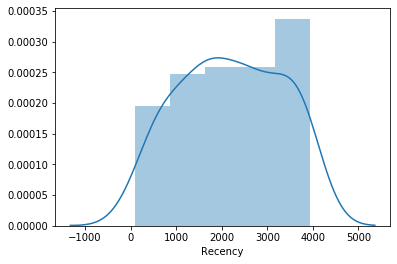

In [12]:
sns.distplot(new_dataset.Recency.sort_values())

In [13]:
diff = (new_dataset.Recency.max() - new_dataset.Recency.min())/5

new_dataset["RecencyScore"] = ""

for i in range(new_dataset.shape[0]):
    if new_dataset.Recency.min() <= new_dataset.iloc[i, 3] <= diff:
        new_dataset.iloc[i, 6] = 5
        continue
    elif diff < new_dataset.iloc[i, 3] <= 2*diff:
        new_dataset.iloc[i, 6] = 4
        continue
    elif 2*diff < new_dataset.iloc[i, 3] <= 3*diff:
        new_dataset.iloc[i, 6] = 3
        continue
    elif 3*diff < new_dataset.iloc[i, 3] <= 4*diff:
        new_dataset.iloc[i, 6] = 2
        continue
    elif 4*diff < new_dataset.iloc[i, 3] <= new_dataset.Recency.max():
        new_dataset.iloc[i, 6] = 1
        continue        

#### 2.2 - Determination of intervals for "Frequency" 

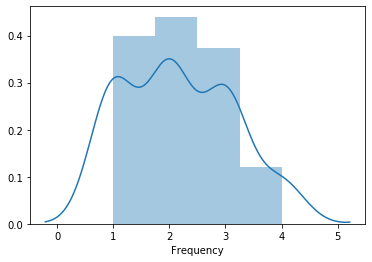

In [14]:
sns.distplot(new_dataset.Frequency.sort_values())

In [15]:
new_dataset["FrequencyScore"] = ""

for i in range(new_dataset.shape[0]):
    if new_dataset.iloc[i, 4] == 4:
        new_dataset.iloc[i, 7] = 4
        continue
    elif new_dataset.iloc[i, 4] == 3:
        new_dataset.iloc[i, 7] = 3
        continue
    elif new_dataset.iloc[i, 4] == 2:
        new_dataset.iloc[i, 7] = 2
        continue
    elif new_dataset.iloc[i, 4] == 1:
        new_dataset.iloc[i, 7] = 1
        continue        

#### 2.3 - Determination of intervals for "Monetary" 

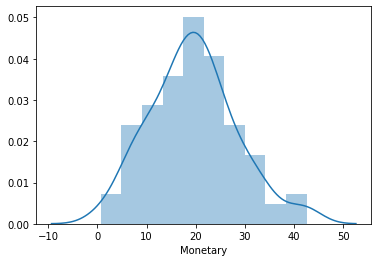

In [16]:
sns.distplot(new_dataset.Monetary.sort_values())

In [17]:
diff = (new_dataset.Monetary.max() - new_dataset.Monetary.min())/5

new_dataset["MonetaryScore"] = ""

for i in range(new_dataset.shape[0]):
    if new_dataset.Monetary.min() <= new_dataset.iloc[i, 5] <= diff:
        new_dataset.iloc[i, 8] = 1
        continue
    elif diff < new_dataset.iloc[i, 5] <= 2*diff:
        new_dataset.iloc[i, 8] = 2
        continue
    elif 2*diff < new_dataset.iloc[i, 5] <= 3*diff:
        new_dataset.iloc[i, 8] = 3
        continue
    elif 3*diff < new_dataset.iloc[i, 5] <= 4*diff:
        new_dataset.iloc[i, 8] = 4
        continue
    elif 4*diff < new_dataset.iloc[i, 5] <= new_dataset.Monetary.max():
        new_dataset.iloc[i, 8] = 5
        continue        

***

# 3 - Calculation of Total Score for Each Customer 

***

#### 3.1 - Using total score weights as recency=25%, frequency=50% and monetary=25%

<font color='red'> - For total score; the given weights of the recency, frequency and monetary are 25%, 50% and 25% respectively. Frequency has the highest weight because it shows the liability of the customers and the others recency and monetary have equal weights because they do not show certain characteristics of customers

In [18]:
trial1 = new_dataset.copy()

trial1["TotalScore"] = ""

for i in range(trial1.shape[0]):
    trial1.iloc[i,9] = 0.25*trial1.iloc[i,6] + 0.5*trial1.iloc[i,7] + 0.25*trial1.iloc[i,8]

In [19]:
rank1 = trial1.sort_values(['TotalScore'], ascending=False)
rank1.head()

,Date bought,Customer,Amount,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TotalScore
627,2009-10-21,68,26.14,436,4,18.005,5,4,3,4
628,2009-11-20,40,0.89,406,4,22.14,5,4,3,4
631,2010-09-29,104,11.94,93,4,22.355,5,4,3,4
623,2009-05-21,38,22.51,589,4,20.6475,5,4,3,4
629,2010-06-07,54,26.56,207,4,19.765,5,4,3,4


In [20]:
#Selecting the customers whose total score is equal or greater than 3 as target customer group

target1 = rank1[rank1['TotalScore'] >= 3]
print(target1.shape)
target1.head(10)

(32, 10)


,Date bought,Customer,Amount,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TotalScore
627,2009-10-21,68,26.14,436,4,18.005,5,4,3,4
628,2009-11-20,40,0.89,406,4,22.14,5,4,3,4
631,2010-09-29,104,11.94,93,4,22.355,5,4,3,4
623,2009-05-21,38,22.51,589,4,20.6475,5,4,3,4
629,2010-06-07,54,26.56,207,4,19.765,5,4,3,4
625,2009-07-28,107,13.29,521,4,17.425,5,4,3,4
621,2009-04-25,52,4.62,615,4,16.6375,5,4,2,3.75
616,2008-08-09,108,9.50,874,4,22.555,4,4,3,3.75
617,2008-09-04,72,26.82,848,3,38.07,4,3,5,3.75
626,2009-08-27,106,3.10,491,4,8.3875,5,4,2,3.75


#### 3.2 - Using total score weights as recency=33.3%, frequency=33.3% and monetary=33.3%

In [21]:
trial2 = new_dataset.copy()

trial2["TotalScore"] = ""

for i in range(trial2.shape[0]):
    trial2.iloc[i,9] = 0.33*trial2.iloc[i,6] + 0.33*trial2.iloc[i,7] + 0.33*trial2.iloc[i,8]

In [22]:
rank2 = trial2.sort_values(['TotalScore'], ascending=False)
rank2.head()

,Date bought,Customer,Amount,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TotalScore
628,2009-11-20,40,0.89,406,4,22.14,5,4,3,3.96
631,2010-09-29,104,11.94,93,4,22.355,5,4,3,3.96
623,2009-05-21,38,22.51,589,4,20.6475,5,4,3,3.96
617,2008-09-04,72,26.82,848,3,38.07,4,3,5,3.96
625,2009-07-28,107,13.29,521,4,17.425,5,4,3,3.96


In [23]:
#Selecting the customers whose total score is equal or greater than 3 as target customer group

target2 = rank2[rank2['TotalScore'] >= 3]
print(target2.shape)
target2.head(10)

(28, 10)


,Date bought,Customer,Amount,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TotalScore
628,2009-11-20,40,0.89,406,4,22.14,5,4,3,3.96
631,2010-09-29,104,11.94,93,4,22.355,5,4,3,3.96
623,2009-05-21,38,22.51,589,4,20.6475,5,4,3,3.96
617,2008-09-04,72,26.82,848,3,38.07,4,3,5,3.96
625,2009-07-28,107,13.29,521,4,17.425,5,4,3,3.96
627,2009-10-21,68,26.14,436,4,18.005,5,4,3,3.96
629,2010-06-07,54,26.56,207,4,19.765,5,4,3,3.96
626,2009-08-27,106,3.10,491,4,8.3875,5,4,2,3.63
621,2009-04-25,52,4.62,615,4,16.6375,5,4,2,3.63
607,2007-08-22,97,28.70,1227,3,26.8033,4,3,4,3.63


# 4 - Summary


**Summary of Modelling Steps**

- The "Bought" attribute was removed from the dataset because it contains the bought car brand and is not important for RFM analysis. 

- All the unique customers' recency, frequency and average monetary values were calculated and added to the end of the dataset.

- In the second stage; bucketing of the recency, frequency and average monetary values were done.

    - Recency and monetary columns were perfectly distributed, their shape was like bell-shaped. So that, they were bucketed evenly by dividing 5 equal intervals.
    
    - However, frequency column has values from 1 to 4 and so there was no need for bucketing. The frequency values assigned as scoring.

- In the third stage; calculation of the total scores of each customer were done with different weights.

    - For the first calculation; recency, frequency and monetary took weights like 25%, 50% and 25% respectively.
    
    - For the second calculation; they are all took equal weights, 33.3%.
    
     

**Interpretation of Results**

- Using different weights for recency, frequency and monetary does not change significantly the top10 customer ranking. There is only 1 difference between the top10 rankings of 25-50-25% weighing and 33.3-33.3-33.3% weighing.

- It seems weighing does not have a huge effect on the ranking of the customers. 


